In [95]:
"""
2f'''+f''*f=0
f[0]=0
f[1]=0
f[2]=ph^2

       3y[n]-3y[n-1]+y[n-2]+hy[n](2y[n]-y[n-1])
f[n+1]=----------------------------------------
                       1+hy[n]
y'[inf]=1 => y[inf]=h+y[n-1]
"""

"\n2f'''+f''*f=0\nf[0]=0\nf[1]=0\nf[2]=ph^2\n\n       3y[n]-3y[n-1]+y[n-2]+hy[n](2y[n]-y[n-1])\nf[n+1]=----------------------------------------\n                       1+hy[n]\ny'[inf]=1 => y[inf]=h+y[n-1]\n"

In [96]:
import numpy as np
import matplotlib.pyplot as plt

In [114]:
h = 0.001
L = 100
N = int(L / h)

In [99]:
# runge-kutta 4
def rg4(f, t0, t1, X0, h):
    N = int((t1 - t0) / h)
    OUT = np.zeros((N, X0.size))
    OUT[0] = X0
    T = np.linspace(t0, t1, N)
    for i in range(0, N - 1):
        k1 = f(T[i], OUT[i])
        k2 = f(T[i] + h / 3, OUT[i] + k1 * h / 3)
        k3 = f(T[i] + 2 * h / 3, OUT[i] - k1 * h / 3 + k2 * h)
        k4 = f(T[i] + h, OUT[i] + k1 * h - k2 * h + k3 * h)
        OUT[i + 1] = OUT[i] + h * (k1 / 8 + 3 * k2 / 8 + 3 * k3 / 8 + k4 / 8)
    return OUT

In [100]:
def solve_with_different_params(P):
    X_0 = np.array([0, 0, P[0]])
    Y_best = rg4(f, 0, L, X_0, h)[:,0]
    p_best = P[0]
    diff_best = (Y_best[-1] - Y_best[-2]) / h
    for p in P[1:]:
        X_0 = np.array([0, 0, p])
        Y = rg4(f, 0, L, X_0, h)[:,0]
        diff = (Y[-1] - Y[-2]) / h
        if np.abs(diff - 1) < np.abs(diff_best - 1):
            diff_best = diff
            p_best = p
            Y_best = Y
    return Y_best, p_best, diff_best

In [101]:
def f(t, X):
    return np.array([X[1], X[2], - X[2] * X[0]])

p_best = 0.4696 	diff_best = 1.000000016523117


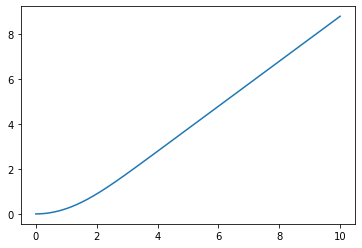

In [113]:
# very very loooong time of wark!!
P = np.linspace(0.46959, 0.46961, 99)
Y, p, d = solve_with_different_params(P)
X = np.linspace(0, L, N, dtype = float)
plt.plot(X, Y)
print("p_best =", p, "\tdiff_best =", d)

p_best = 0.4696 	diff_best = 1.000000016517788


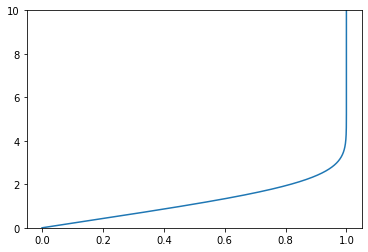

In [119]:
p = 0.4696
X_0 = np.array([0, 0, p])
out = rg4(f, 0, L, X_0, h)
X = np.linspace(0, L, N, dtype = float)
Y = out[:, 0]
#plt.plot(X, Y)
plt.plot( out[:, 1], X)
plt.ylim(0, 10)
print("p_best =", p, "\tdiff_best =", (Y[-1] - Y[-2]) / h)